In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import tensorflow as tf

In [45]:
from typing import Dict


def read_tfrecord(serialized_example) -> Dict:

    feature_description = {
        'emotion': tf.io.FixedLenFeature((), tf.string),
        'intensity': tf.io.FixedLenFeature((), tf.string),
        'actor': tf.io.FixedLenFeature((), tf.string),
        'mel_spect': tf.io.FixedLenFeature((), tf.string)
    }

    example = tf.io.parse_single_example(serialized_example,
                                         feature_description)

    mel_spect = tf.io.parse_tensor(example['mel_spect'], out_type=np.float32)
    mel_spect = mel_spect.numpy()
    example['mel_spect'] = mel_spect

    return example

['OVERLOADABLE_OPERATORS', '_USE_EQUALITY', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__bool__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__iter__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_add_consumer', '_as_node_def_input', '_as_tf_output', '_c_api_shape', '_copy', '_copy_nograd', '_co

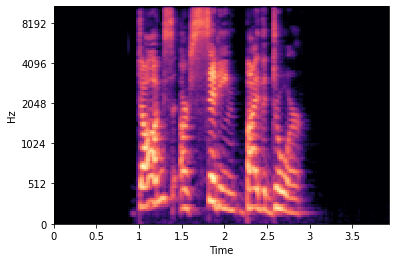

In [39]:
import librosa
import librosa.display

dataset = tf.data.TFRecordDataset('spectorgrams.tfrecord')

for item in dataset:
    record = read_tfrecord(item)
    
    librosa.display.specshow(record['mel_spect'], y_axis='mel', x_axis='time');
    break

In [44]:
# def _parse_function(example_proto):

#     return tf.io.parse_single_example(example_proto, read_tfrecord)


dataset = tf.data.TFRecordDataset('spectorgrams.tfrecord')

dataset.map(read_tfrecord)
# dataset.take(1)

aa


<MapDataset shapes: {actor: (), emotion: (), intensity: (), mel_spect: <unknown>}, types: {actor: tf.string, emotion: tf.string, intensity: tf.string, mel_spect: tf.float32}>

In [18]:
item.__class__

tensorflow.python.framework.ops.EagerTensor